In [1]:
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokens import Token
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
from wordcloud import WordCloud, STOPWORDS
from matplotlib import rcParams
from spacy.lang.en.stop_words import STOP_WORDS


In [2]:
"""data preprocesing revies
1--> remove puntuation
2--> lower
3--> remove $%^&
4__> remove stop wrods like hotel , hotels . nyc, 



"""

'data preprocesing revies\n1--> remove puntuation\n2--> lower\n3--> remove $%^&\n4__> remove stop wrods like hotel , hotels . nyc, \n\n\n\n'

In [2]:
# only upload two features
df_1 = pd.read_csv('five_hotels.csv', usecols = ['reviews', 'review_rating'])
df_2 = pd.read_csv('last_hotels.csv', usecols = ['reviews', 'review_rating'])
df = pd.concat([df_1, df_2])
# reseting index
df = df.reset_index(drop=True)

In [3]:
df.head()

,reviews,review_rating
0,Let me start off by saying that I understand t...,10
1,We had yet another wonderful visit at this hot...,50
2,It was one of the best hotels I have ever stay...,50
3,This hotel is just fantastic. The location is...,50
4,Amazing park views from this hotel : ) Nicole ...,50


## Cleaning Dataset

In [4]:
# remove 0 from review_rating
df['review_rating'] = df.review_rating.apply(lambda x: int(str(x).split()[0][0]))
# int(df['try'][0].split()[0][0])


In [5]:
# First convert to lower case then removed Punctuations, Numbers, Special Characters and finally remove duplicated spaces 
# return a list of characters

df['reviews'] = df['reviews'].str.replace("[^a-zA-Z]", " ").str.replace("\s+", " ").str.lower()
#" ".join(df['ti'].str.split())

In [6]:
# df['tete'] = df['reviews'].str.lower().str.replace("[^a-z#]", " ").str.translate(str.maketrans(' ', ' ', '\n\t\r'))


In [7]:
# removing words less than 3
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [12]:
# df.head()

,reviews,review_rating,ti
0,Let me start off by saying that I understand t...,10,let me start off by saying that i understand t...
1,We had yet another wonderful visit at this hot...,50,we had yet another wonderful visit at this hot...
2,It was one of the best hotels I have ever stay...,50,it was one of the best hotels i have ever stay...
3,This hotel is just fantastic. The location is...,50,this hotel is just fantastic the location is s...
4,Amazing park views from this hotel : ) Nicole ...,50,amazing park views from this hotel nicole an...


## Tokenize, Remove Stop Words and Lemmatization¶


In [14]:
# spacy_nlp = spacy.load('en_core_web_sm')
#  # added hotel and room
#     added_stopwords = ['thee', 'thing', 'thy', 'ye', 'thou', 'hath', 'room', 'hotel']
#     # nlp.Defaults.stop_words |= {'thee', 'thing', 'thy', 'ye', 'thou', 'hath'}
#     for w in added_stopwords:
#         nlp.vocab[w].is_stop = True
#         doc = nlp(doc_tokens)

In [130]:
# # added hotel and room
# added_stopwords = ['thee', 'thing', 'thy', 'ye', 'thou', 'hath', 'room', 'hotel']
# # nlp.Defaults.stop_words |= {'thee', 'thing', 'thy', 'ye', 'thou', 'hath'}
# for w in added_stopwords:
#     nlp.vocab[w].is_stop = True
# # print(STOP_WORDS)

True
True
True
True
True
True
True
True


In [ ]:
# customize_stop_words = [
#     'computing', 'filtered'
# ]
# for w in customize_stop_words:
#     spacy_nlp.vocab[w].is_stop = True
# doc = spacy_nlp(article)
# tokens = [token.text for token in doc if not token.is_stop]
# print('Original Article: %s' % (article))
# print()
# print(tokens)

In [8]:
# STOPWORDS.add("hotel")    
# nlp.vocab["hotel"].is_stop 
# adding 'hotel' to STOPWORDS
nlp.vocab["hotel"].is_stop = True
nlp.vocab["hotel"].is_stop 


True

In [9]:
# it takes time becuase it returns meninfull words
def remove_stop(doc_tokens):
    """removes stop words and returns list of all nonstop words that are lemmatized"""


    return [token.lemma_ for token in doc_tokens if not token.is_stop]

In [10]:
df['Reviews_tokenize'] = df['reviews'].apply(lambda x: remove_stop(nlp(x)))


In [11]:
# note no tengo claro si despues de preprocesing tengo que return in str o unas lista de str!!!
# jueves creo qie no lo voy a usar porque necesito una lista de workds
df['Reviews_tokenize_join'] = df['Reviews_tokenize'].apply(lambda x: ' '.join(x))


In [12]:
df.head()

,reviews,review_rating,Reviews_tokenize,Reviews_tokenize_join
0,start saying that understand that this hard ti...,1,"[start, say, understand, hard, time, city, cou...",start say understand hard time city country en...
1,another wonderful visit this hotel this time w...,5,"[wonderful, visit, time, park, view, thank, up...",wonderful visit time park view thank upgrade l...
2,best hotels have ever stayed absolutely worth ...,5,"[good, hotel, stay, absolutely, worth, money, ...",good hotel stay absolutely worth money view ce...
3,this hotel just fantastic location spot being ...,5,"[fantastic, location, spot, step, central, par...",fantastic location spot step central park view...
4,amazing park views from this hotel nicole staf...,5,"[amazing, park, view, nicole, staff, professio...",amazing park view nicole staff professional fr...


In [127]:
df['Reviews_tokenize'][0]

['start',
 'say',
 'understand',
 'hard',
 'time',
 'city',
 'country',
 'entire',
 'world',
 'healthcare',
 'provider',
 'epidemiologist',
 'people',
 'say',
 'bother',
 'stay',
 'open',
 'decide',
 'stay',
 'birthday',
 'food',
 'nice',
 'restaurant',
 'book',
 'room',
 'ability',
 'socially',
 'distance',
 'enter',
 'home',
 'desk',
 'attitude',
 'cold',
 'uninvite',
 'wine',
 'glass',
 'provide',
 'drinking',
 'glass',
 'one',
 'bathroom',
 'bucket',
 'ability',
 'coffee',
 'response',
 'essentially',
 'close',
 'fine',
 'hotel',
 'actually',
 'closed',
 'point',
 'stay',
 'open',
 'charge',
 'people',
 'money',
 'guise',
 'open',
 'have',
 'actually',
 'open',
 'stay',
 'hotel',
 'pandemic',
 'maintain',
 'social',
 'distancing',
 'stay',
 'hotel',
 'mother',
 'bring',
 'grocery',
 'enter',
 'home',
 'risk',
 'go',
 'guest',
 'comfortable',
 'despite',
 'limitation',
 'unfortunately',
 'clearly',
 'case',
 'think',
 'figure',
 'stay',
 'open',
 'collect',
 'money',
 'actually',
 '

## Bag of Words

In [13]:
def counter(st_):
    dic = {}
    all_words = ' '.join([text for text in st_])
    all_words = all_words.split()
    for i in all_words:
        if i not in dic:
            dic[i] = 1
        else:
            dic[i] +=1
    return dic
#     return sorted(dic, key=lambda x: x[0]) 
#     return {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}

        

In [14]:
count_dict = {word :count  for word, count in counter(df['Reviews_tokenize_join']).items()}

In [15]:
df_freque = pd.DataFrame(count_dict.items(), columns=['word', 'count'])
df_freque.sort_values(['count'], inplace = True , ascending = False)
df_freque.head()
df_count_word = df_freque.iloc[:20]

In [16]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="count", y="word", data=df_count_word)
ax.set(title = 'Frequency Word')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 2000x1000 with 1 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

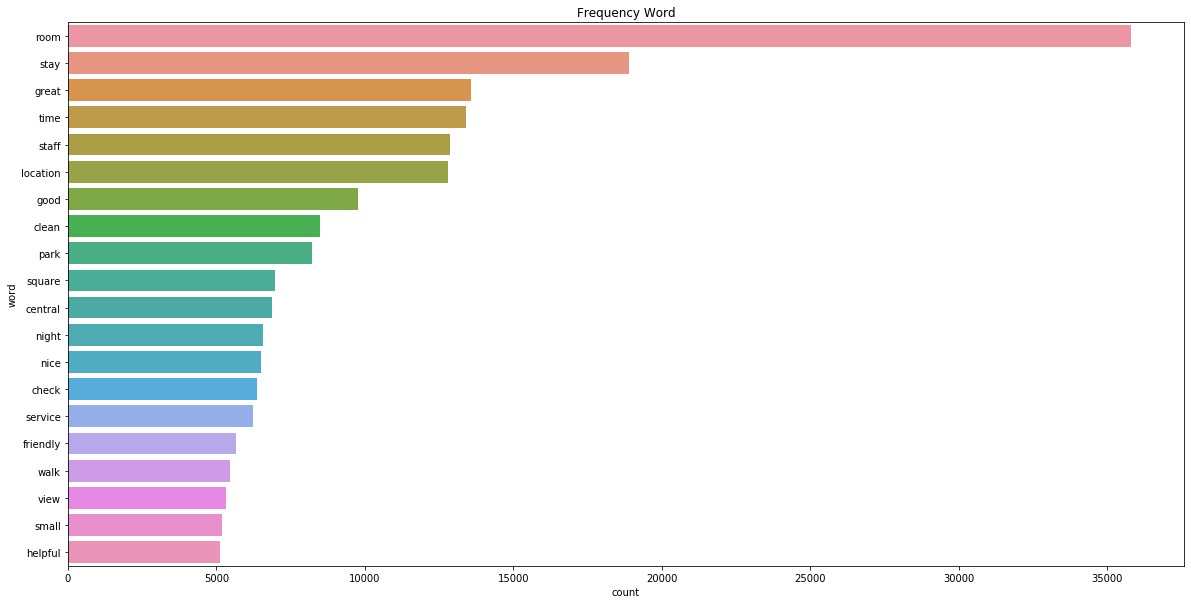

In [17]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="count", y="word", data=df_count_word)
ax.set(title = 'Frequency Word')
plt.show()

In [13]:
# freque = pd.DataFrame.from_dict(count_dict , orient = 'index')
# freque.reset_index(inplace = True)
# freque['word'] = freque['index']
# freque['count'] = freque[0]
# freque.sort_values(['count'], inplace = True , ascending = False)
# df_count_word = freque.iloc[:20 , [2,3]]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Text(0.5, 1.0, 'Frequency Word')]

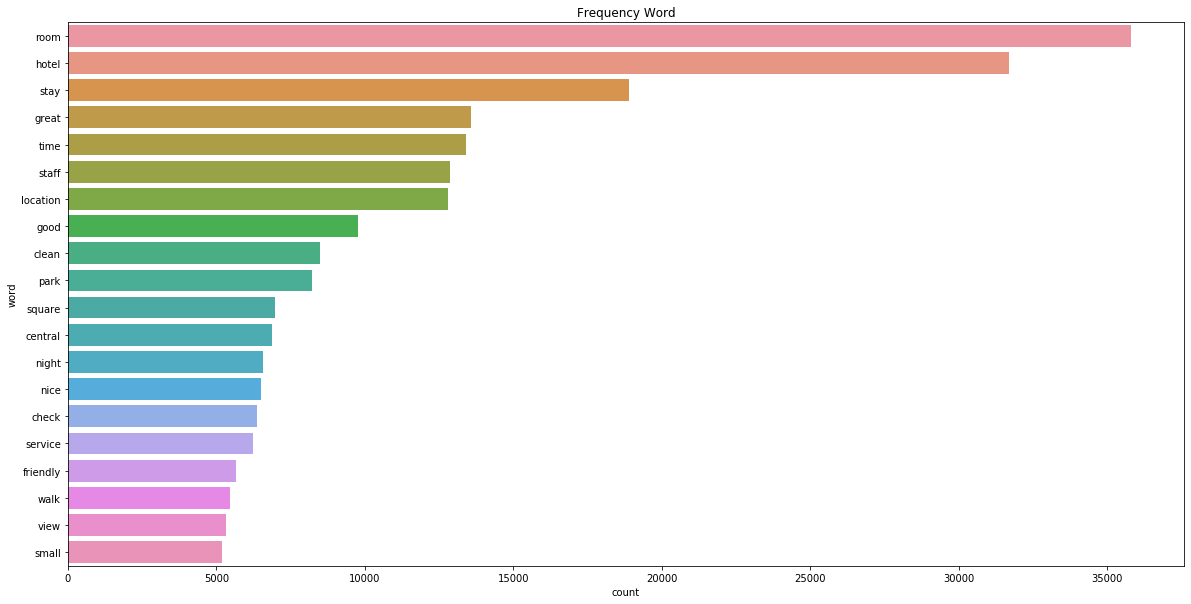

In [15]:
# plt.figure(figsize=(20,10))
# ax = sns.barplot(x="count", y="word", data=df_count_word)
# ax.set(title = 'Frequency Word')


In [21]:
def show_wordcloud(data, title = None): 
    wordcloud = WordCloud( collocations=False,
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=50, 
        scale=4,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

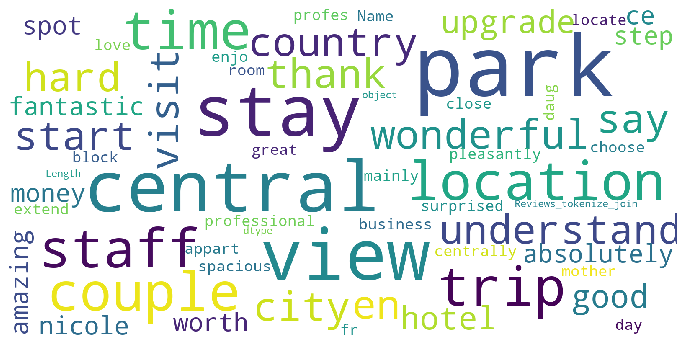

In [22]:
show_wordcloud(df['Reviews_tokenize_join'])

In [33]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokens import Token
from spacy import displacy
from wordcloud import WordCloud, STOPWORDS


In [12]:
STOPWORDS.add('hotel')


In [14]:
# stopwords = STOPWORDS
add_more_stopwords = ['hotel','fr','nicole','daug']
for i in add_more_stopwords:
    STOPWORDS.add(i)
stopwords = STOPWORDS


In [18]:
wordcloud = WordCloud(stopwords=set(stopwords), background_color="white", max_words=100).generate(str(df['Reviews_tokenize_join']))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

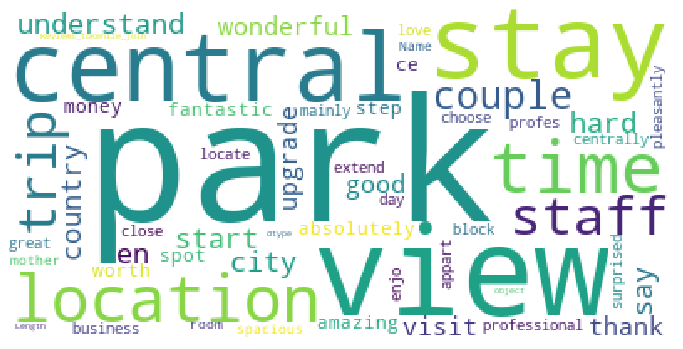

In [22]:
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(wordcloud)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

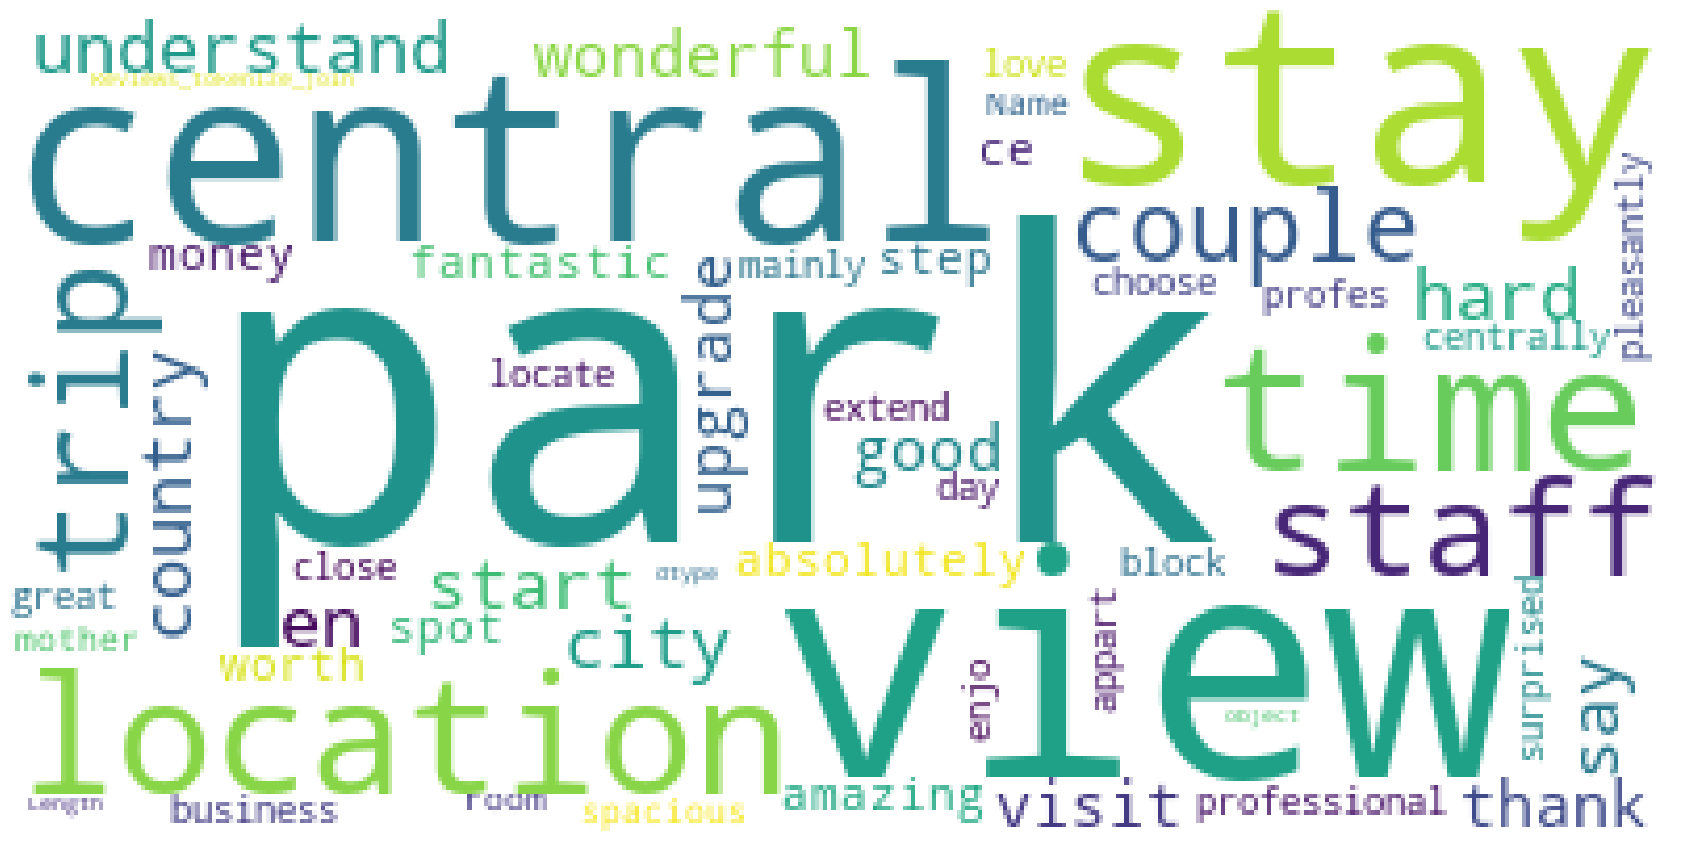

In [20]:
rcParams['figure.figsize'] = 30, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [21]:
df.to_csv('data_for_model.csv', index = False)

In [ ]:
dict_ = df['Reviews_tokenize'].apply(lambda x : counter(x))

In [145]:
dict_ = {}
all_words = ' '.join([text for text in l])
all_words = all_words.split()
for i in all_words:
    if i not in dict_:
        dict_[i] = 1
    else:
        dict_[i] += 1
print(dict_)
#     words_df = pd.DataFrame({'word': list(dict_.keys()) , 'count':list(dict_.values())})
#     df_sort = words_df.nlargest(columns = 'count' , n = 20)
#     print(df_sort)

{'let': 1, 'start': 1, 'say': 2, 'understand': 1, 'hard': 1, 'time': 1, 'city': 2, 'country': 1, 'entire': 1, 'world': 1, 'healthcare': 1, 'provider': 1, 'epidemiologist': 1, 'people': 2, 'hotel': 9, 've': 1, 'bother': 1, 'stay': 7, 'open': 6, 'decide': 1, 'birthday': 1, 'get': 1, 'food': 1, 'nice': 1, 'restaurant': 1, 'book': 1, 'room': 1, 'ability': 2, 'eat': 1, 'socially': 1, 'distance': 1, 'enter': 2, 's': 2, 'home': 2, 'desk': 1, 'guy': 1, 'attitude': 1, 'cold': 1, 'uninviting': 1, 'wine': 1, 'glass': 2, 'provide': 2, 'drinking': 1, 'one': 1, 'sit': 1, 'bathroom': 1, 'ice': 1, 'bucket': 1, 'coffee': 1, 'response': 1, 'essentially': 1, 'close': 2, 'fine': 1, 'lot': 2, 'actually': 3, 'closed': 1, 'don': 1, 't': 2, 'point': 1, 'charge': 1, 'money': 2, 'guise': 1, 'have': 1, 'pandemic': 1, 'maintain': 1, 'social': 1, 'distancing': 1, 'mother': 1, 'bring': 1, 'grocery': 1, 'win': 1, 'risk': 1, 'go': 1, 'way': 1, 'try': 1, 'guest': 1, 'comfortable': 1, 'despite': 1, 'limitation': 1, 'un

In [144]:
l = df['Reviews_tokenize'][0]

In [139]:
all_words = ' '.join([text for text in s])

In [140]:
all_words.split()

['l',
 'e',
 't',
 's',
 't',
 'a',
 'r',
 't',
 's',
 'a',
 'y',
 'u',
 'n',
 'd',
 'e',
 'r',
 's',
 't',
 'a',
 'n',
 'd',
 'h',
 'a',
 'r',
 'd',
 't',
 'i',
 'm',
 'e',
 'c',
 'i',
 't',
 'y',
 'c',
 'o',
 'u',
 'n',
 't',
 'r',
 'y',
 'e',
 'n',
 't',
 'i',
 'r',
 'e',
 'w',
 'o',
 'r',
 'l',
 'd',
 'h',
 'e',
 'a',
 'l',
 't',
 'h',
 'c',
 'a',
 'r',
 'e',
 'p',
 'r',
 'o',
 'v',
 'i',
 'd',
 'e',
 'r',
 'e',
 'p',
 'i',
 'd',
 'e',
 'm',
 'i',
 'o',
 'l',
 'o',
 'g',
 'i',
 's',
 't',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 's',
 'a',
 'y',
 'h',
 'o',
 't',
 'e',
 'l',
 'v',
 'e',
 'b',
 'o',
 't',
 'h',
 'e',
 'r',
 's',
 't',
 'a',
 'y',
 'o',
 'p',
 'e',
 'n',
 'd',
 'e',
 'c',
 'i',
 'd',
 'e',
 's',
 't',
 'a',
 'y',
 'b',
 'i',
 'r',
 't',
 'h',
 'd',
 'a',
 'y',
 'g',
 'e',
 't',
 'f',
 'o',
 'o',
 'd',
 'n',
 'i',
 'c',
 'e',
 'r',
 'e',
 's',
 't',
 'a',
 'u',
 'r',
 'a',
 'n',
 't',
 'b',
 'o',
 'o',
 'k',
 'r',
 'o',
 'o',
 'm',
 'a',
 'b',
 'i',
 'l',
 'i',
 't',
 'y'

In [125]:
df['dict']

0        {'let': 1, 'start': 1, 'say': 2, 'understand':...
1        {'wonderful': 1, 'visit': 1, 'hotel': 1, 'time...
2        {'good': 2, 'hotel': 1, 'stay': 1, 'absolutely...
3        {'hotel': 3, 'fantastic': 2, 'location': 1, 's...
4        {'amazing': 1, 'park': 2, 'view': 1, 'hotel': ...
                               ...                        
25045    {'th': 1, 'stay': 1, 'park': 1, 'central': 1, ...
25046    {'stay': 1, 'business': 1, 'trip': 2, 'extend'...
25047    {'love': 1, 'stay': 2, 'park': 1, 'central': 1...
25048    {'great': 1, 'location': 1, 'couple': 1, 'bloc...
25049    {'pleasantly': 1, 'surprised': 1, 'spacious': ...
Name: dict, Length: 25050, dtype: object

In [119]:
df['Reviews_tokenize_join'].apply(lambda x : counter(x))

0        {'l': 48, 'e': 93, 't': 70, ' ': 128, 's': 41,...
1        {'w': 8, 'o': 8, 'n': 10, 'd': 3, 'e': 17, 'r'...
2        {'g': 3, 'o': 13, 'd': 4, ' ': 18, 'h': 2, 't'...
3        {'h': 8, 'o': 25, 't': 29, 'e': 30, 'l': 16, '...
4        {'a': 13, 'm': 5, 'z': 1, 'i': 7, 'n': 7, 'g':...
                               ...                        
25045    {'t': 21, 'h': 3, ' ': 46, 's': 14, 'a': 24, '...
25046    {'s': 22, 't': 32, 'a': 26, 'y': 9, ' ': 62, '...
25047    {'l': 12, 'o': 9, 'v': 1, 'e': 13, ' ': 18, 's...
25048    {'g': 3, 'r': 16, 'e': 31, 'a': 23, 't': 20, '...
25049    {'p': 6, 'l': 15, 'e': 27, 'a': 19, 's': 8, 'n...
Name: Reviews_tokenize_join, Length: 25050, dtype: object

In [114]:
counter(df['Reviews_tokenize'][0])

{'let': 1,
 'start': 1,
 'say': 2,
 'understand': 1,
 'hard': 1,
 'time': 1,
 'city': 2,
 'country': 1,
 'entire': 1,
 'world': 1,
 'healthcare': 1,
 'provider': 1,
 'epidemiologist': 1,
 'people': 2,
 'hotel': 9,
 've': 1,
 'bother': 1,
 'stay': 7,
 'open': 6,
 'decide': 1,
 'birthday': 1,
 'get': 1,
 'food': 1,
 'nice': 1,
 'restaurant': 1,
 'book': 1,
 'room': 1,
 'ability': 2,
 'eat': 1,
 'socially': 1,
 'distance': 1,
 'enter': 2,
 's': 2,
 'home': 2,
 'desk': 1,
 'guy': 1,
 'attitude': 1,
 'cold': 1,
 'uninviting': 1,
 'wine': 1,
 'glass': 2,
 'provide': 2,
 'drinking': 1,
 'one': 1,
 'sit': 1,
 'bathroom': 1,
 'ice': 1,
 'bucket': 1,
 'coffee': 1,
 'response': 1,
 'essentially': 1,
 'close': 2,
 'fine': 1,
 'lot': 2,
 'actually': 3,
 'closed': 1,
 'don': 1,
 't': 2,
 'point': 1,
 'charge': 1,
 'money': 2,
 'guise': 1,
 'have': 1,
 'pandemic': 1,
 'maintain': 1,
 'social': 1,
 'distancing': 1,
 'mother': 1,
 'bring': 1,
 'grocery': 1,
 'win': 1,
 'risk': 1,
 'go': 1,
 'way': 1,
 

In [49]:
from collections import Counter

In [76]:
Counter(df['Reviews_tokenize_join']).most_common(10)

[('book standard room advance have year look forward visit opt upgrade suite suite lovely sit room bedroom massive bathroom sadly foot usable closet space jacket shirt blouse length move standard room good room apart closet area near basin bathroom pepper people s toothpaste yuk edge carpet vacuum long time fluff centimetre thick noise fan atrium loud early morning go customer service desk people tell hotel chance change didn t bother',
  2),
 ('let start say understand hard time city country entire world healthcare provider epidemiologist people say hotel ve bother stay open decide stay birthday get food nice restaurant book room ability eat socially distance enter s home desk guy s attitude cold uninviting wine glass provide drinking glass one sit bathroom ice bucket ability coffee response hotel essentially close fine lot hotel actually closed don t point stay open charge people money guise open have actually open stay hotel pandemic maintain social distancing stay hotel mother brin

In [13]:
df['l'] = df['reviews'].apply(lambda x: x.split())
# lista

In [14]:
df['l']

0        [Let, me, start, off, by, saying, that, I, und...
1        [We, had, yet, another, wonderful, visit, at, ...
2        [It, was, one, of, the, best, hotels, I, have,...
3        [This, hotel, is, just, fantastic., The, locat...
4        [Amazing, park, views, from, this, hotel, :, )...
                               ...                        
25045    [It, was, my, 6th, stay, in, Park, Central,, I...
25046    [I, stayed, here, for, a, business, trip,, but...
25047    [Loved, our, stay, at, Park, Central., Central...
25048    [Great, location,, a, couple, of, blocks, from...
25049    [I, was, pleasantly, surprised, how, spacious,...
Name: l, Length: 25050, dtype: object

In [15]:
df['l'] = df['l'].apply(lambda x: ' '.join(x))


In [16]:
df['l']

0        Let me start off by saying that I understand t...
1        We had yet another wonderful visit at this hot...
2        It was one of the best hotels I have ever stay...
3        This hotel is just fantastic. The location is ...
4        Amazing park views from this hotel : ) Nicole ...
                               ...                        
25045    It was my 6th stay in Park Central, I always c...
25046    I stayed here for a business trip, but extende...
25047    Loved our stay at Park Central. Centrally loca...
25048    Great location, a couple of blocks from Centra...
25049    I was pleasantly surprised how spacious the ro...
Name: l, Length: 25050, dtype: object

In [17]:
df['l'] = df['l'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [18]:
df['l']

0        start saying that understand that this hard ti...
1        another wonderful visit this hotel this time w...
2        best hotels have ever stayed. Absolutely worth...
3        This hotel just fantastic. location spot being...
4        Amazing park views from this hotel Nicole staf...
                               ...                        
25045    stay Park Central, always choose mainly becaus...
25046    stayed here business trip, extended trip coupl...
25047    Loved stay Park Central. Centrally located, pr...
25048    Great location, couple blocks from Central Par...
25049    pleasantly surprised spacious rooms were. were...
Name: l, Length: 25050, dtype: object